In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import joblib
import pickle

import category_encoders as ce



%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ds = pd.read_csv('./dataSource/AllCities.csv')
ds.head()

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,Bangalore,JP Nagar Phase 1,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Bangalore,Dasarahalli on Tumkur Road,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Bangalore,Kannur on Thanisandra Main Road,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Bangalore,Doddanekundi,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Bangalore,Kengeri,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [4]:
ds.shape

(32963, 41)

In [5]:
ds = ds[ds['City']!='Kolkata']
ds.shape

(26456, 41)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26456 entries, 0 to 32962
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                26456 non-null  int64 
 1   Area                 26456 non-null  int64 
 2   City                 26456 non-null  object
 3   Location             26456 non-null  object
 4   No. of Bedrooms      26456 non-null  int64 
 5   Resale               26456 non-null  int64 
 6   MaintenanceStaff     26456 non-null  int64 
 7   Gymnasium            26456 non-null  int64 
 8   SwimmingPool         26456 non-null  int64 
 9   LandscapedGardens    26456 non-null  int64 
 10  JoggingTrack         26456 non-null  int64 
 11  RainWaterHarvesting  26456 non-null  int64 
 12  IndoorGames          26456 non-null  int64 
 13  ShoppingMall         26456 non-null  int64 
 14  Intercom             26456 non-null  int64 
 15  SportsFacility       26456 non-null  int64 
 16  ATM 

In [7]:
ds.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.645600e+04,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,...,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000
mean,1.246840e+07,1280.866495,2.357802,0.398511,5.656335,5.789008,5.748979,5.723843,5.718136,5.731479,...,5.863207,5.626550,5.704906,5.610372,5.600129,5.613093,5.611959,5.611241,5.599977,5.611430
std,2.464550e+07,751.979292,0.826810,0.489601,4.289396,4.124688,4.175511,4.206916,4.213994,4.197417,...,4.027734,4.324952,4.230324,4.344056,4.356079,4.340853,4.342188,4.343033,4.356256,4.342811
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.399750e+06,820.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.400000e+06,1124.000000,2.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.320000e+07,1515.000000,3.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,8.546000e+08,16000.000000,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [8]:
# cleaning the data
# removing the missing values,removing unimportant features(wifi,wordrobe),removing the records with very high price & drop city

ds.replace(9,np.nan,inplace = True)
ds.dropna(inplace = True)
print(ds.shape)
ds.drop(columns = ['Wifi','Wardrobe','City'],inplace = True)

newPrice = ds["Price"]< 100000000
ds = ds[newPrice]
ds.head()


(10018, 41)


,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8358000,1675,Doddanekundi,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6845000,1670,Kengeri,3,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
ds.shape

(9988, 38)

In [10]:
#EDA
# 1. Statistical representation
# 2. Using a heatmap for graphical presentation
# 3. Using Pearson correlation of the noted columns
# 4. Using a Scatterplot to see the relationship

In [11]:
ds.corr()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Refrigerator
Price,1.000000,0.725919,0.527510,0.186786,0.129246,0.192006,0.199203,0.170656,0.152973,0.183114,...,0.211025,0.109016,0.129456,0.103813,0.128631,0.093360,0.139314,0.118248,0.128368,0.130984
Area,0.725919,1.000000,0.736294,-0.000933,-0.009876,0.283045,0.320116,0.248983,0.264639,0.202527,...,0.326330,0.137116,0.038262,0.165484,0.134353,0.067399,0.094692,0.109479,0.116806,0.109158
No. of Bedrooms,0.527510,0.736294,1.000000,0.003017,-0.098684,0.130349,0.176207,0.121031,0.131639,0.066508,...,0.188512,0.107838,-0.019366,0.082207,0.092504,0.017359,0.070513,0.079618,0.073262,0.076463
Resale,0.186786,-0.000933,0.003017,1.000000,0.266750,-0.152522,-0.227528,-0.136394,-0.172922,-0.016315,...,-0.154727,0.010216,0.182928,0.007939,-0.025548,-0.049890,0.011717,-0.018591,0.016550,-0.017137
MaintenanceStaff,0.129246,-0.009876,-0.098684,0.266750,1.000000,0.137817,0.067882,0.190977,0.165915,0.324128,...,0.029303,0.128490,0.232271,0.220878,-0.012250,0.141180,0.022783,-0.021684,-0.010651,-0.014880
Gymnasium,0.192006,0.283045,0.130349,-0.152522,0.137817,1.000000,0.758748,0.578877,0.632611,0.481988,...,0.719241,0.373611,0.129054,0.368191,0.111646,0.139418,0.071604,0.122165,0.140343,0.108428
SwimmingPool,0.199203,0.320116,0.176207,-0.227528,0.067882,0.758748,1.000000,0.631210,0.690618,0.528690,...,0.668332,0.319456,0.010045,0.427070,0.146649,0.167730,0.092199,0.154691,0.160596,0.141418
LandscapedGardens,0.170656,0.248983,0.121031,-0.136394,0.190977,0.578877,0.631210,1.000000,0.682962,0.588559,...,0.550856,0.279181,0.014549,0.448192,0.081759,0.180842,0.042738,0.089862,0.107796,0.086404
JoggingTrack,0.152973,0.264639,0.131639,-0.172922,0.165915,0.632611,0.690618,0.682962,1.000000,0.615251,...,0.580460,0.253866,-0.034543,0.540302,0.073844,0.194746,0.037852,0.068708,0.072561,0.073326
RainWaterHarvesting,0.183114,0.202527,0.066508,-0.016315,0.324128,0.481988,0.528690,0.588559,0.615251,1.000000,...,0.454096,0.287600,-0.018265,0.557174,0.035555,0.150962,0.051146,0.038037,0.047609,0.044543


<Axes: >

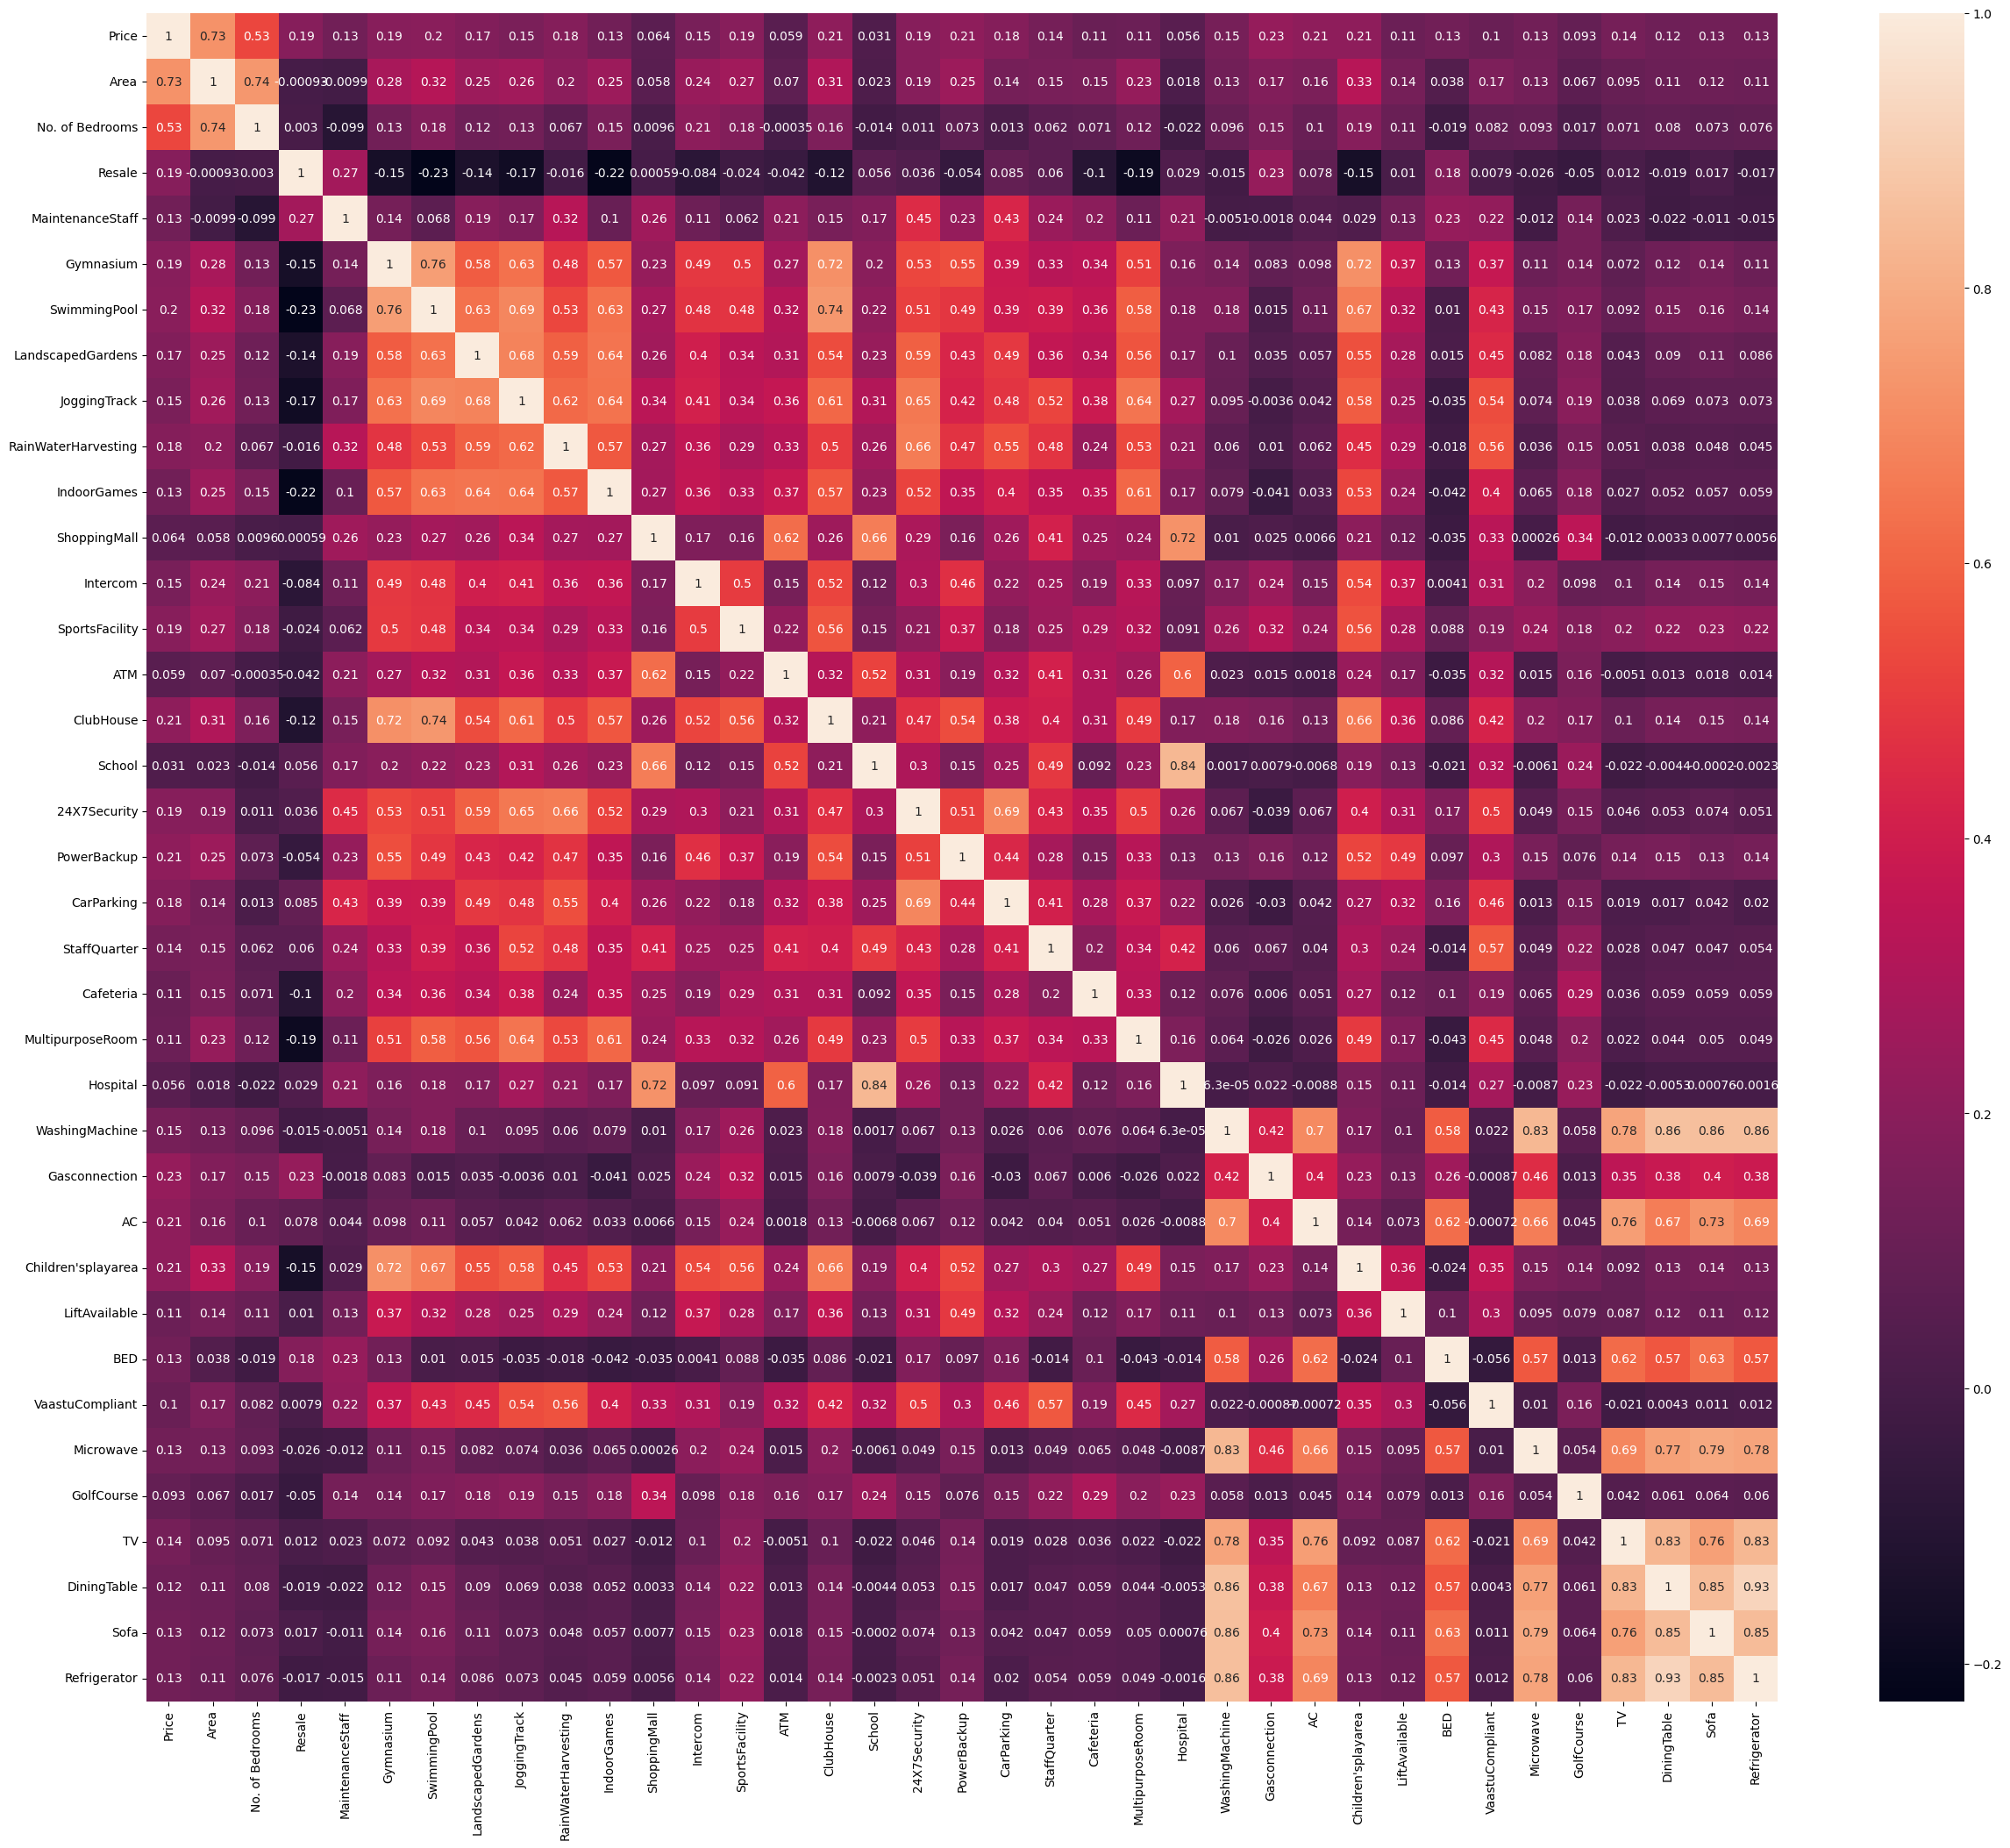

In [12]:
heatmap_ds = ds.select_dtypes(exclude='O')

plt.figure(figsize = (30,25))
sns.heatmap(heatmap_ds.corr(),annot=True)

In [13]:
# Comparing 'Price' with 'Area' using Pearson correlation because they have a correlation of 0.73

pearsonr(ds['Price'], ds['Area'])

PearsonRResult(statistic=0.725919309405716, pvalue=0.0)

Text(0.5, 1.0, 'scatter plot for price vs area')

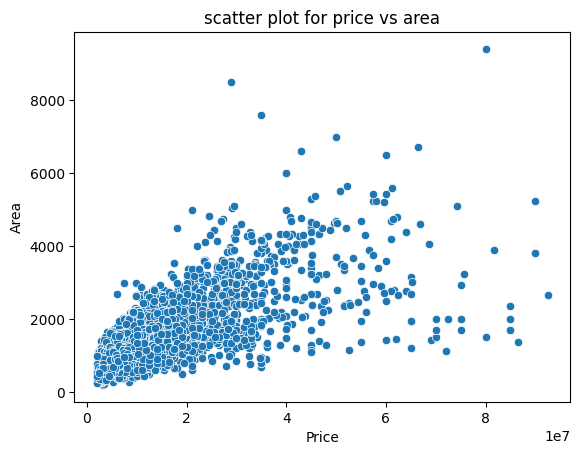

In [14]:
#scatter plot for price vs area

sns.scatterplot(x=ds['Price'],y=ds['Area'])
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('scatter plot for price vs area')

In [15]:
ds.to_csv('cleaned_data.csv')


ds["Price"]=np.log(ds["Price"])
ds["Area"]=np.log(ds["Area"])

ds.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Refrigerator
0,17.216708,8.113726,JP Nagar Phase 1,4,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.880853,6.951772,Dasarahalli on Tumkur Road,2,0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.397783,7.072422,Kannur on Thanisandra Main Road,2,0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.938730,7.423568,Doddanekundi,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15.739029,7.420579,Kengeri,3,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# X = ds[['Area','Location','No. of Bedrooms','Resale','MaintenanceStaff','Gymnasium','SwimmingPool','LandscapedGardens','JoggingTrack','ClubHouse','24X7Security','PowerBackup','CarParking']]
X = ds.drop(columns=['Price'])
X
y = ds['Price']
X.columns


Index(['Area', 'Location', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff',
       'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Children'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Refrigerator'],
      dtype='object')

In [17]:
CATEGORICAL_COLUMNS = []
for col in X.columns:
    d_type = X[col].dtype
    if d_type == "object":
        CATEGORICAL_COLUMNS.append(col)

print(X.info())
print()
print("Categorical columns:", CATEGORICAL_COLUMNS)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 26641
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 9988 non-null   float64
 1   Location             9988 non-null   object 
 2   No. of Bedrooms      9988 non-null   int64  
 3   Resale               9988 non-null   int64  
 4   MaintenanceStaff     9988 non-null   float64
 5   Gymnasium            9988 non-null   float64
 6   SwimmingPool         9988 non-null   float64
 7   LandscapedGardens    9988 non-null   float64
 8   JoggingTrack         9988 non-null   float64
 9   RainWaterHarvesting  9988 non-null   float64
 10  IndoorGames          9988 non-null   float64
 11  ShoppingMall         9988 non-null   float64
 12  Intercom             9988 non-null   float64
 13  SportsFacility       9988 non-null   float64
 14  ATM                  9988 non-null   float64
 15  ClubHouse            9988 non-null   

In [18]:
# Converting CATEGORICAL COLUMNS to NUMERICAL COLUMNS
# Location is a nominal variable. But since there are a lot of unique values, we will be using OrdinalEncoder
# CATEGORICAL_COLUMNS = ds['Location']
from sklearn.preprocessing import OrdinalEncoder

ord = OrdinalEncoder()
# for col in CATEGORICAL_COLUMNS:
X[CATEGORICAL_COLUMNS] = ord.fit_transform(X[CATEGORICAL_COLUMNS])


# joblib.dump(ord, 'ordinal_encoder.joblib')

X.head()

,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Refrigerator
0,8.113726,243.0,4,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.951772,150.0,2,0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.072422,290.0,2,0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.423568,158.0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.420579,307.0,3,0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [21]:
print(X_train.shape)
print(X_test.shape)

(7990, 37)
(1998, 37)


In [22]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
model.score(X_test,y_test)

0.8690128874837638

In [24]:
# input_data = pd.DataFrame({
#     'Area': [9],
#     'Location': [54],
#     'No. of Bedrooms': [4.0],
#     'Resale': True,
#     'ATM' : 1,
#     'Gymnasium' : 1
# })

# output = model.predict(input_data)
# print(output)

In [25]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='constant', fill_value=0)
# X_filled = imputer.fit_transform(input_data)
# input_data
# y_predd = model.predict(X_filled)


In [26]:
# # encoder = joblib.load('ordinal_encoder.joblib')

# # print(encoder.transform('JP Nagar Phase 1'))
# new_data = pd.DataFrame({
#     'Area': [9],
#     'Location': 'JP Nagar Phase 1',
#     'No. of Bedrooms': [4.0],
#     'Resale': True
# })

# new_data.head()

# new_data['Location'] = encoder.transform(new_data[['Location']])

# new_data.head()

# model.predict(new_data)


In [27]:
def transform(new_df):
    new_df['Area'] = np.log(new_df['Area'])
    new_df['Location'] = encoder.transform(new_df[['Location']])
    return new_df

In [28]:
# new_df = pd.DataFrame({
#     'Area': [1000],
#     'Location': 'JP Nagar Phase 1',
#     'No. of Bedrooms': [1.0],
#     'Resale': True
# })

# final_df = transform(new_df)

# final_df

# print(model.predict(final_df))

In [29]:
pickle.dump(model,open('buy_model_all.pkl','wb'))